In [1]:
%load_ext autoreload

import json
import numpy as np
import pandas as pd
from src.pyipums.parse_xml import read_ipums_ddi
from src.pyipums.clean_data import IpumsAcsCleaner
from ipumspy import readers, ddi
from matplotlib import pyplot as plt
import plotly
import plotly.io as pio

import seaborn as sns
import matplotlib as mpl
from IPython.core.display import display

plt.rcParams["figure.figsize"]=12,8  # Set figure size for the notebook
sns.set(style="whitegrid")           # set seaborn whitegrid theme

plotly.offline.init_notebook_mode(connected=True)

# pio.renderers.default = 'iframe' # or 'notebook' or 'colab' or 'jupyterlab'
# pio.renderers.default = 'jupyterlab'
# This is the one that works
pio.renderers.default = 'iframe'

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_66890/2463348950.py:15: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [2]:
from utils import *

In [3]:
ddi_file_path = "./usa_00005.xml"
data_file_path = "./usa_00005.dat.gz"

ddi_codebook = readers.read_ipums_ddi(ddi_file_path)

/Users/franciscojavierarceo/.pyenv/versions/3.8.16/lib/python3.8/site-packages/ipumspy/readers.py:47: CitationWarning:

Use of data from IPUMS is subject to conditions including that users should cite the data appropriately.
See the `ipums_conditions` attribute of this codebook for terms of use.
See the `ipums_citation` attribute of this codebook for the appropriate citation.



In [4]:
for c in ddi_codebook.data_description:
    print(c.name, " - ", c.label)
    # print("*" * 30)

YEAR  -  Census year
SAMPLE  -  IPUMS sample identifier
SERIAL  -  Household serial number
CBSERIAL  -  Original Census Bureau household serial number
HHWT  -  Household weight
CLUSTER  -  Household cluster for variance estimation
STATEICP  -  State (ICPSR code)
STATEFIP  -  State (FIPS code)
METRO  -  Metropolitan status
CITY  -  City
STRATA  -  Household strata for variance estimation
GQ  -  Group quarters status
PERNUM  -  Person number in sample unit
CBPERNUM  -  Original Census Bureau person number in sample unit
PERWT  -  Person weight
SLWT  -  Sample-line weight
RELATE  -  Relationship to household head [general version]
RELATED  -  Relationship to household head [detailed version]
SEX  -  Sex
AGE  -  Age
BIRTHQTR  -  Quarter of birth
MARST  -  Marital status
BIRTHYR  -  Year of birth
MARRNO  -  Times married
MARRINYR  -  Married within the past year
YRMARR  -  Year married
DIVINYR  -  Divorced in the past year
WIDINYR  -  Widowed in the past year
FERTYR  -  Children born within

In [5]:
ipums_df = readers.read_microdata(
    ddi_codebook,
    data_file_path,
    # nrows=None,
    subset=acs_xvars,
)

In [6]:
ipums_df.shape

(3373378, 112)

In [7]:
ipums_df.head(2).T

,0,1
YEAR,2022,2022
SAMPLE,202201,202201
SERIAL,1,2
CBSERIAL,2022010000031,2022010000111
HHWT,69.0,22.0
...,...,...
DIFFEYE,1,2
DIFFHEAR,1,2
VETSTAT,1,1
VETSTATD,11,11


In [8]:
# df = IpumsCleaner(ipums_df, ddi_codebook).clean_data()

In [9]:
pt(ddi_codebook, ipums_df, 'LANGUAGE').head(50)

,LANGUAGE,code,count,Percent
0,English,1,2609590,0.773584
1,Spanish,12,341936,0.101363
2,N/A or blank,0,155340,0.046049
3,Chinese,43,39386,0.011676
4,Hindi and related,31,29660,0.008792
5,"Filipino, Tagalog",54,21524,0.006381
6,French,11,17560,0.005205
7,Vietnamese,50,16150,0.004787
8,German,2,13638,0.004043
9,Dravidian,40,11805,0.003499


In [10]:
pt(ddi_codebook, ipums_df, 'HISPAN')

,HISPAN,code,count,Percent
0,Not Hispanic,0,2854487,0.846181
1,Mexican,1,306729,0.090926
2,Other,4,143467,0.042529
3,Puerto Rican,2,46495,0.013783
4,Cuban,3,22200,0.006581


In [11]:
pt(ddi_codebook, ipums_df, 'LABFORCE')

,LABFORCE,code,count,Percent
0,"Yes, in the labor force",2,1640446,0.486292
1,"No, not in the labor force",1,1168944,0.34652
2,N/A,0,563988,0.167188


In [12]:
ddi_codebook.get_variable_info('EDUCD')

VariableDescription(id='EDUCD', name='EDUCD', rectype='', codes={'N/A or no schooling': 0, 'N/A': 1, 'No schooling completed': 2, 'Nursery school to grade 4': 10, 'Nursery school, preschool': 11, 'Kindergarten': 12, 'Grade 1, 2, 3, or 4': 13, 'Grade 1': 14, 'Grade 2': 15, 'Grade 3': 16, 'Grade 4': 17, 'Grade 5, 6, 7, or 8': 20, 'Grade 5 or 6': 21, 'Grade 5': 22, 'Grade 6': 23, 'Grade 7 or 8': 24, 'Grade 7': 25, 'Grade 8': 26, 'Grade 9': 30, 'Grade 10': 40, 'Grade 11': 50, 'Grade 12': 60, '12th grade, no diploma': 61, 'High school graduate or GED': 62, 'Regular high school diploma': 63, 'GED or alternative credential': 64, 'Some college, but less than 1 year': 65, '1 year of college': 70, '1 or more years of college credit, no degree': 71, '2 years of college': 80, "Associate's degree, type not specified": 81, "Associate's degree, occupational program": 82, "Associate's degree, academic program": 83, '3 years of college': 90, '4 years of college': 100, "Bachelor's degree": 101, '5+ year

In [15]:
df = IpumsAcsCleaner(ipums_df, ddi_codebook=ddi_codebook).clean_data()

In [16]:
df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEICP,STATEFIP,METRO,CITY,...,Degree,Industry,Hispanic,Language Spoken,Labor Force,Speak English,Hispanic or Not,Race,Birthplace,Educational Attainment
0,2022,202201,1,2022010000031,69.0,2022000000011,41,1,4,0,...,N/A,N/A (not applicable),Not Hispanic,English,"No, not in the labor force","Yes, speaks only English",Not Hispanic,Two major races,Alabama,High school diploma or equivalent
1,2022,202201,2,2022010000111,22.0,2022000000021,41,1,0,0,...,N/A,Department stores,Not Hispanic,English,"No, not in the labor force","Yes, speaks only English",Not Hispanic,White,Alabama,High school diploma or equivalent
2,2022,202201,3,2022010000200,45.0,2022000000031,41,1,4,0,...,N/A,Meat products,Not Hispanic,English,"No, not in the labor force","Yes, speaks only English",Not Hispanic,Black/African American,Alabama,Less than High School Diploma
3,2022,202201,4,2022010000261,4.0,2022000000041,41,1,0,0,...,N/A,N/A (not applicable),Not Hispanic,English,"No, not in the labor force","Yes, speaks only English",Not Hispanic,Black/African American,Alabama,Less than High School Diploma
4,2022,202201,5,2022010000296,47.0,2022000000051,41,1,3,0,...,N/A,All construction,Not Hispanic,English,"No, not in the labor force","Yes, speaks only English",Not Hispanic,White,Alabama,High school diploma or equivalent


In [17]:
pt(None, df, 'Hispanic or Not')

,Hispanic or Not,count,Percent
0,Not Hispanic,2854487,0.846181
1,Hispanic,518891,0.153819


In [19]:
from src.pyipums.clean_data import map_codes

In [20]:
df['Degree'] = map_codes(ddi_codebook, df, 'DEGFIELDD')

In [32]:
df['Race Simple']  = np.where(df['Race'].str.contains('Two major races|Other race, nec|Three or more major races'), 
                              'Other', df['Race'])

df.loc[df['Race'].str.contains('Chinese'), 'Race Simple']  = 'Asian'
df.loc[df['Race'].str.contains('Japanese'), 'Race Simple']  = 'Asian'
df.loc[df['Race'].str.contains('Other Asian or Pacific Islander'), 'Race Simple']  = 'Asian'
df.loc[df['Race'].str.contains('American Indian or Alaska Native'), 'Race Simple']  = 'Native American'

In [54]:
df['Race x Hispanic or Not']  = df['Race Simple'] + "+ \n " + df['Hispanic or Not']

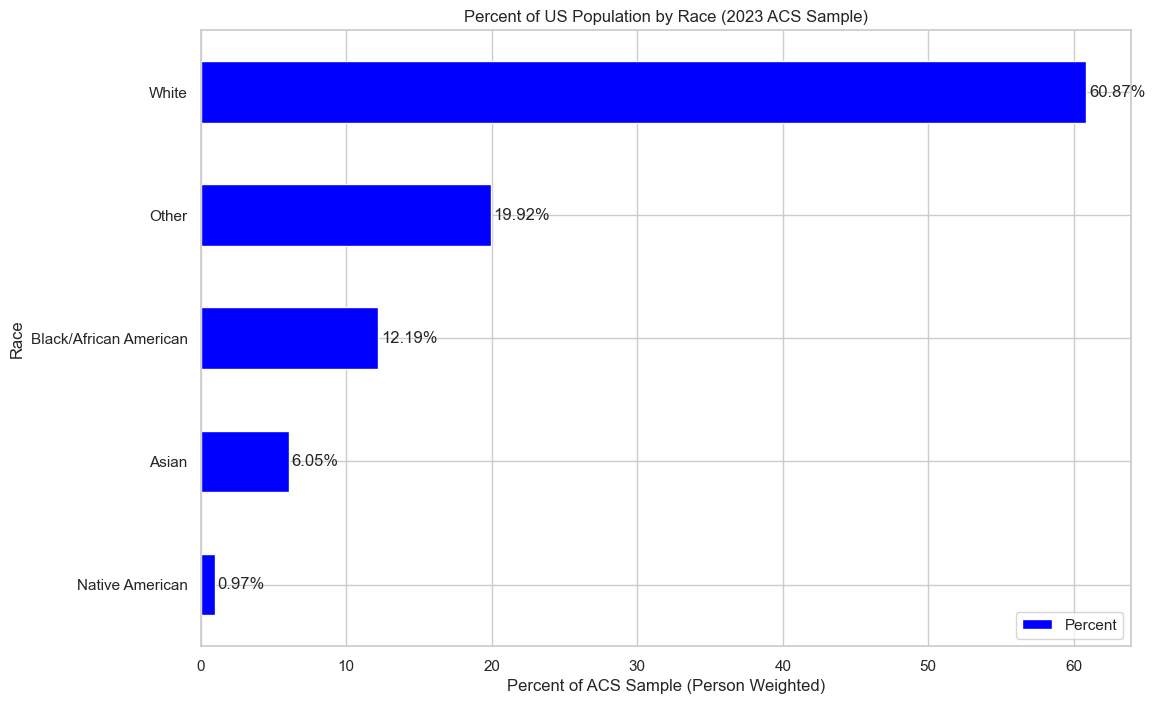

In [66]:
ptbarplot(None, 
          df, 
          'Race Simple', 
          'PERWT', 
          xlabel='Percent of ACS Sample (Person Weighted)', 
          ylabel='Race', 
          title='Percent of US Population by Race (2023 ACS Sample)',
)

In [70]:
pt(None, 
          df, 
          'Race x Hispanic or Not', 
          'PERWT', 
         )

,Race x Hispanic or Not,count,raw_count,raw_percent,Percent
0,White+ \n Not Hispanic,192159103.0,2155253,0.638901,0.576556
1,Other+ \n Hispanic,49965106.0,400353,0.118680,0.149916
2,Black/African American+ \n Not Hispanic,39588212.0,292633,0.086748,0.118781
3,Asian+ \n Not Hispanic,19830945.0,207145,0.061406,0.059501
4,Other+ \n Not Hispanic,16415289.0,169318,0.050192,0.049253
5,White+ \n Hispanic,10726673.0,94323,0.027961,0.032184
6,Native American+ \n Not Hispanic,1744795.0,30138,0.008934,0.005235
7,Native American+ \n Hispanic,1477015.0,13206,0.003915,0.004432
8,Black/African American+ \n Hispanic,1030894.0,7887,0.002338,0.003093
9,Asian+ \n Hispanic,349530.0,3122,0.000925,0.001049


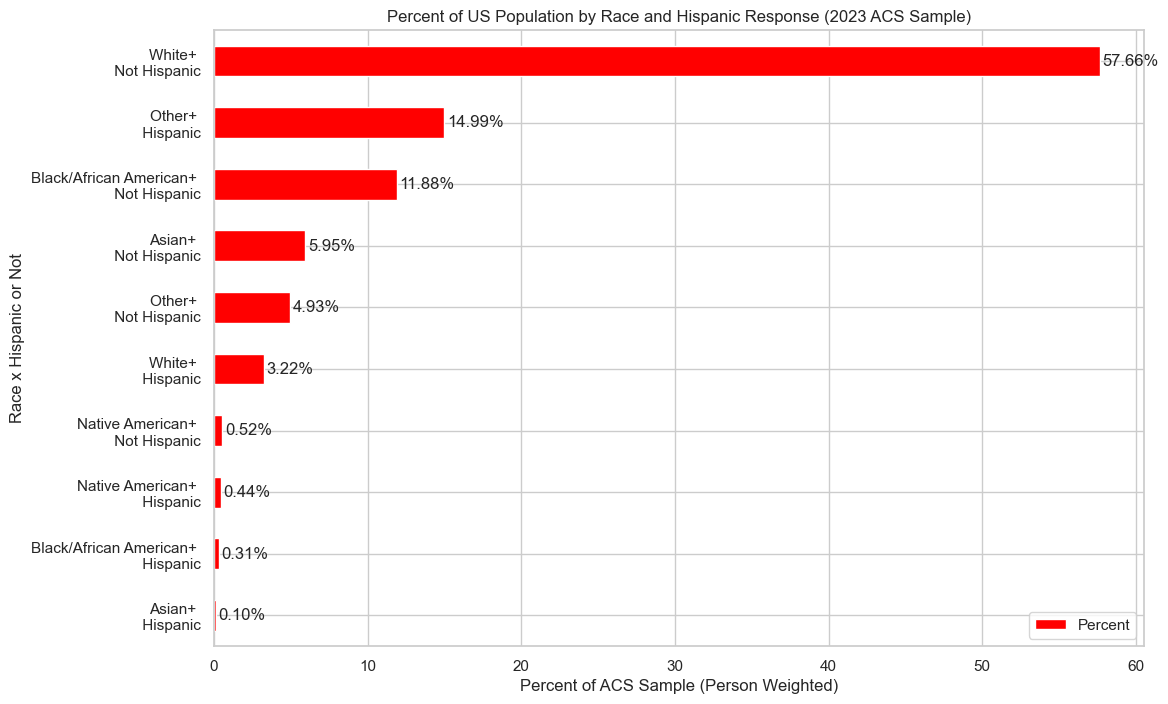

In [69]:
ptbarplot(None, 
          df, 
          'Race x Hispanic or Not', 
          'PERWT', 
          color='red',
          xlabel='Percent of ACS Sample (Person Weighted)', 
          ylabel='Race x Hispanic or Not', 
          title='Percent of US Population by Race and Hispanic Response (2023 ACS Sample)',
)
# ptbarplot(None, df, 'Race x Hispanic or Not', 'PERWT', color='red')

In [74]:
x = pt(ddi_codebook, df, 'STATEFIP', 'PERWT')

In [78]:
x.head()

,STATEFIP,code,count,raw_count,raw_percent,Percent
0,California,6,39029342.0,391171,0.115958,0.117104
1,Texas,48,30029572.0,292919,0.086833,0.090101
2,Florida,12,22244823.0,217799,0.064564,0.066744
3,New York,36,19677151.0,203891,0.060441,0.059040
4,Pennsylvania,42,12972008.0,132605,0.039309,0.038921


In [80]:
x['Percent'][0:4].sum()

0.33298838796750535

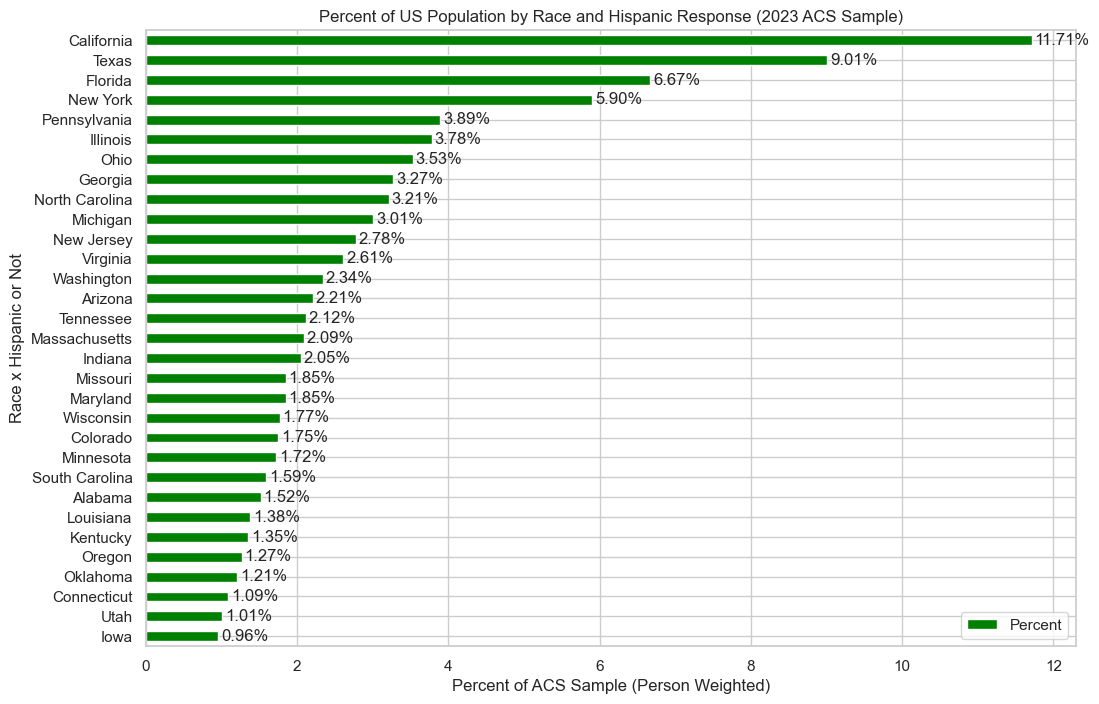

In [73]:
ptbarplot(ddi_codebook, 
          df, 
          'STATEFIP', 
          'PERWT', 
          color='green',
          xlabel='Percent of ACS Sample (Person Weighted)', 
          ylabel='Race x Hispanic or Not', 
          title='Percent of US Population by Race and Hispanic Response (2023 ACS Sample)',
)
# ptbarplot(None, df, 'Race x Hispanic or Not', 'PERWT', color='red')

In [71]:
pt(None, df, 'Race x Hispanic or Not', 'PERWT').head(10)

,Race x Hispanic or Not,count,raw_count,raw_percent,Percent
0,White+ \n Not Hispanic,192159103.0,2155253,0.638901,0.576556
1,Other+ \n Hispanic,49965106.0,400353,0.118680,0.149916
2,Black/African American+ \n Not Hispanic,39588212.0,292633,0.086748,0.118781
3,Asian+ \n Not Hispanic,19830945.0,207145,0.061406,0.059501
4,Other+ \n Not Hispanic,16415289.0,169318,0.050192,0.049253
5,White+ \n Hispanic,10726673.0,94323,0.027961,0.032184
6,Native American+ \n Not Hispanic,1744795.0,30138,0.008934,0.005235
7,Native American+ \n Hispanic,1477015.0,13206,0.003915,0.004432
8,Black/African American+ \n Hispanic,1030894.0,7887,0.002338,0.003093
9,Asian+ \n Hispanic,349530.0,3122,0.000925,0.001049


In [23]:
pt(None, df, 'Race', 'PERWT').head(10)

,Race,count,raw_count,raw_percent,Percent
0,White,202885776.0,2249576,0.666862,0.608741
1,Black/African American,40619106.0,300520,0.089086,0.121874
2,Two major races,38989535.0,348782,0.103393,0.116985
3,"Other race, nec",24388197.0,193674,0.057412,0.073175
4,Other Asian or Pacific Islander,14945165.0,150747,0.044687,0.044842
5,Chinese,4507003.0,51099,0.015148,0.013523
6,American Indian or Alaska Native,3221810.0,43344,0.012849,0.009667
7,Three or more major races,3002663.0,27215,0.008068,0.009009
8,Japanese,728307.0,8421,0.002496,0.002185


In [21]:
pt(None, df, 'Degree').head(10)

,Degree,count,Percent
0,N/A,2456369,0.728418
1,Business Management and Administration,52737,0.015639
2,Psychology,41403,0.012278
3,Nursing,40262,0.011939
4,General Business,38330,0.011366
5,General Education,34375,0.010194
6,Accounting,32513,0.009641
7,Elementary Education,31902,0.009460
8,Biology,30933,0.009173
9,English Language and Literature,26965,0.007996


In [90]:
def ptbarplot2(xdf, col, gvar, wvar, colors=['red', 'blue'], title='', sort_var='Percent_x', ascending=True, labels=None, ddi=None, n=10, output=False, fmt="%.1f%%", fontsize=10):
    if labels is None:
        labels = sorted(list(xdf[col].unique()))

    for i, label in enumerate(labels):
        if i==0:
            tm = pt(ddi, xdf[xdf[col]==label], gvar, wvar)
            tm.rename({"Percent": f"Percent_{label}"}, axis=1, inplace=True)
        else:
            tplus1 = pt(ddi, xdf[xdf[col]==label], gvar, wvar)
            tplus1.rename({"Percent": f"Percent_{label}"}, axis=1, inplace=True)
            tm = tm.merge(tplus1, on=gvar)

    if sort_var == 'Percent_x':
        sort_var = f"Percent_{label}"

    tm = tm.sort_values(by=sort_var, ascending=ascending)
        
    tm[[c for c in tm.columns if 'Percent' in c]] = tm[
        [c for c in tm.columns if 'Percent' in c]
    ] * 100.
    try:
        ylabel = ddi.get_variable_info(gvar).label.title()
    except:
        ylabel = gvar
    
    g = tm.reset_index(drop=True).loc[0:n].sort_values(by=sort_var, ascending=True).plot.barh(
        x=gvar,
        y=[c for c in tm.columns if 'Percent' in c],
        color=colors,
        label=labels,
        title=title,
        figsize=(12, 8),
        fontsize=fontsize,
        legend='lower right',
    )

    for container in g.containers:
        g.bar_label(container, fmt=fmt, padding=2, fontsize=fontsize)

    g.legend(labels, loc='lower right')
    g.set_ylabel(ylabel)
    g.set_xlabel("Within Group Percent of Data")
    if output:
        return tm

In [96]:
lsdf = pt(None, df, 'Speak English', "PERWT")

In [97]:
lsdf

,Speak English,count,raw_count,raw_percent,Percent
0,"Yes, speaks only English",245883574.0,2608655,0.773306,0.737752
1,"Yes, speaks very well",42719318.0,381421,0.113068,0.128176
2,N/A (Blank),18287320.0,155340,0.046049,0.054869
3,"Yes, speaks well",13204708.0,119525,0.035432,0.039620
4,"Yes, but not well",8996214.0,75512,0.022385,0.026992
5,Does not speak English,4196428.0,32925,0.009760,0.012591


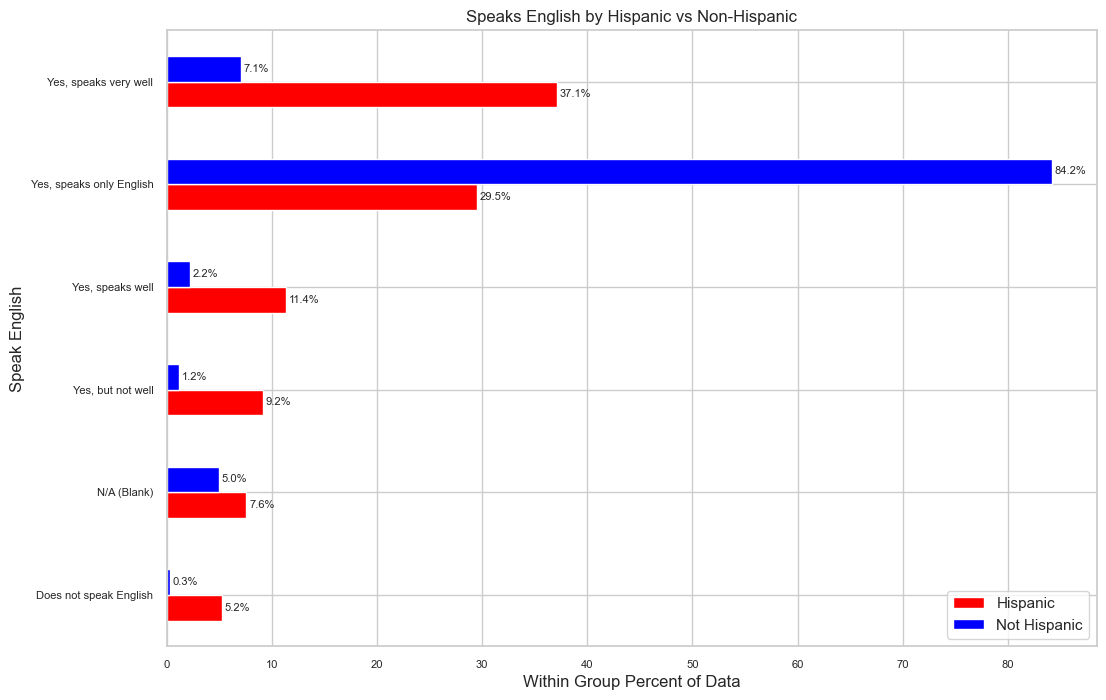

In [99]:
ptbarplot2(
    df, 
    col='Hispanic or Not', 
    gvar='Speak English', 
    wvar='PERWT', 
    colors=['red', 'blue'],
    title='Speaks English by Hispanic vs Non-Hispanic', 
    ddi=None,
    sort_var='Percent_Hispanic',
    ascending=False,
    n=None,
    output=False,
    fmt="%.1f%%",
    fontsize=8,
)

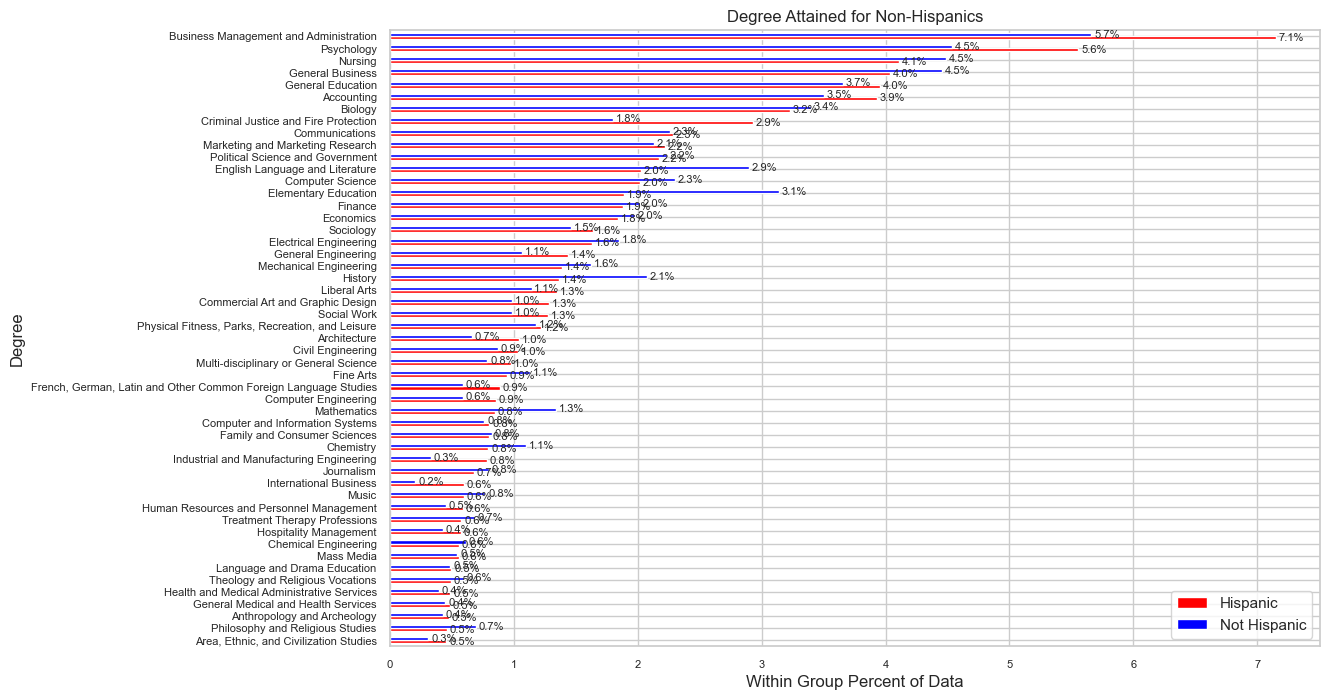

In [94]:
ptbarplot2(
    df[df['Degree'] !="N/A"], 
    col='Hispanic or Not', 
    gvar='Degree', 
    wvar='PERWT', 
    colors=['red', 'blue'],
    title='Degree Attained for Non-Hispanics', 
    ddi=None,
    sort_var='Percent_Hispanic',
    ascending=False,
    n=50,
    output=False,
    fmt="%.1f%%",
    fontsize=8,
)